In [142]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np

In [143]:
# Read the data from the CSV file with read from Numpy
data = np.loadtxt("Salary_dataset.csv", delimiter=",", dtype=str)

print(data)

[['' 'YearsExperience' 'Salary']
 ['0' '1.2000000000000002' '39344.0']
 ['1' '1.4000000000000001' '46206.0']
 ['2' '1.6' '37732.0']
 ['3' '2.1' '43526.0']
 ['4' '2.3000000000000003' '39892.0']
 ['5' '3.0' '56643.0']
 ['6' '3.1' '60151.0']
 ['7' '3.3000000000000003' '54446.0']
 ['8' '3.3000000000000003' '64446.0']
 ['9' '3.8000000000000003' '57190.0']
 ['10' '4.0' '63219.0']
 ['11' '4.1' '55795.0']
 ['12' '4.1' '56958.0']
 ['13' '4.199999999999999' '57082.0']
 ['14' '4.6' '61112.0']
 ['15' '5.0' '67939.0']
 ['16' '5.199999999999999' '66030.0']
 ['17' '5.3999999999999995' '83089.0']
 ['18' '6.0' '81364.0']
 ['19' '6.1' '93941.0']
 ['20' '6.8999999999999995' '91739.0']
 ['21' '7.199999999999999' '98274.0']
 ['22' '8.0' '101303.0']
 ['23' '8.299999999999999' '113813.0']
 ['24' '8.799999999999999' '109432.0']
 ['25' '9.1' '105583.0']
 ['26' '9.6' '116970.0']
 ['27' '9.7' '112636.0']
 ['28' '10.4' '122392.0']
 ['29' '10.6' '121873.0']]


In [144]:
# Separate the features (YearsExperience) from the target variable (Salary)
# print(data[1:, 2:3])

X = data[1:, 1:2][:,0].astype(float)
y = data[1:, 2:3][:,0].astype(float)


print(f'{X.shape=}')
print(f'{y.shape=}')

# print(X[:3], y[:3])

print(X, y)

X.shape=(30,)
y.shape=(30,)
[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6] [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


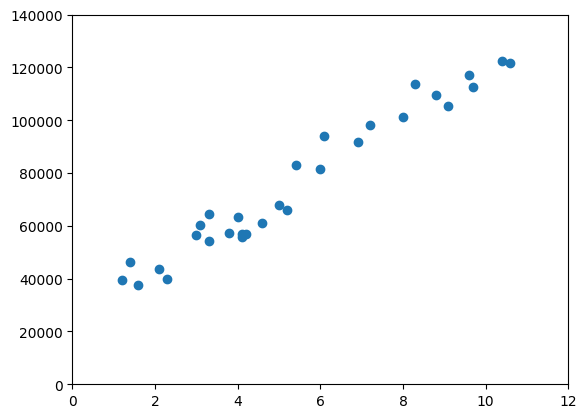

In [145]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import matplotlib.pyplot as plt


#You have to reproduce this graph
plt.scatter("YearsExperience", "Salary", data={"YearsExperience": X, "Salary":y})
plt.xlim(0, 12)
plt.ylim(0, 140000)
plt.show()

In [146]:
# Let's create a function that displays the point line with the bar.
# y = m * x + b
# m = theta[1]
# b = theta[0]
# (0,theta[0]) (12, theta[1] 12 plus theta[0])
# y = theta[1] * 12 + theta[0]

def visualize(theta, X, y):
    fig, ax = plt.subplots()
    ax.scatter("YearsExperience", "Salary", data={"YearsExperience": X, "Salary":y})
    ax.plot([0, 12], [theta[0], theta[1] * 12 + theta[0]])

    plt.xlim(0, 12)
    plt.ylim(-10000, 140000)
    plt.show()

[0. 0.]


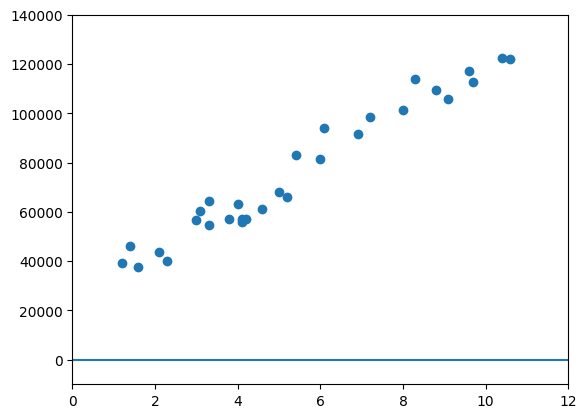

In [147]:
# Ok, let's test our function now, you should get a result comparable to this one

theta = np.zeros(2)
theta[1] = 0
theta[0] = 0
print(theta)
visualize(theta, X, y)

In [148]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
    return X * theta[1] + theta[0]

print(predict(X, theta))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [149]:
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    m = X.shape[0]

    # Loop over the number of iterations
    for _ in range(num_iters):
        # y = theta[0] + theta[1] * X + error

        intercept = theta[0]
        slope = theta[1]
        prediction = slope * X + intercept

        delta_intercept = 1 * (prediction - y)
        deta_slope = X * delta_intercept
        theta[0] -= delta_intercept.mean() * alpha
        theta[1] -= deta_slope.mean() * alpha        
    return theta

In [150]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(finetuned_theta)

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

[21912.58918422  9880.81400461]


In [ ]:
# Ok, let's test our function now, you should get a result comparable to this one
visualize(fit(X, y, theta, 0.01, 0), X, y)
visualize(fit(X, y, theta, 0.01, 1), X, y)
visualize(fit(X, y, theta, 0.01, 2), X, y)
visualize(fit(X, y, theta, 0.01, 3), X, y)
visualize(fit(X, y, theta, 0.01, 4), X, y)
visualize(fit(X, y, theta, 0.01, 1000), X, y)

In [168]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    loss = y - predict(X, theta)

    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    cost = sum(loss ** 2 * 1 / (2 * len(X)))

    # Return the computed cost as a measure of model fit
    return cost


In [169]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)

3251553638.866667


In [170]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration

    # Loop over the specified number of iterations
    for itr in range(num_iters):
        # Calculate the loss (difference between predictions and actual values)

        # Update the temporary values of theta for both coefficients using the gradient descent formula
        
        intercept = theta[0]
        slope = theta[1]
        prediction = slope * X + intercept

        delta_intercept = 1 * (prediction - y)
        deta_slope = X * delta_intercept
        
        # Update the theta values
        theta[0] -= delta_intercept.mean() * alpha
        theta[1] -= deta_slope.mean() * alpha

        # Calculate and append the cost for the current theta values to the history list
        J_history.append(cost(X, y, theta))


        # Perform one iteration of gradient descent (update theta values)

    # Return the final theta values and the list of cost values over iterations
    return (theta, J_history)

In [171]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

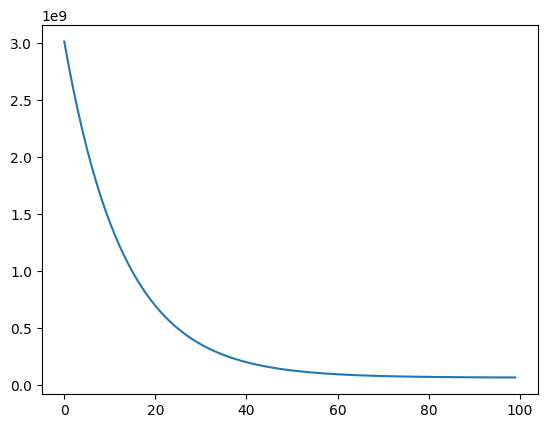

In [172]:
#You have to reproduce this graph

plt.plot(J_history)

In [173]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))

Predicted salary for 10 years of experience 127134.91360616997
